In [1]:
from src.workflow import Workflow
from src.utils_experiment import read_config
from src.utils_data import load_data
from matplotlib import pyplot as plt
import numpy as np

from src.utils_visualization import reduce_and_plot

import warnings
warnings.filterwarnings('ignore')

In [12]:
# plt.ioff()
config = read_config('spellman')
X, Y = load_data(config['dataset']['name'])

In [7]:
w = Workflow(X, Y)

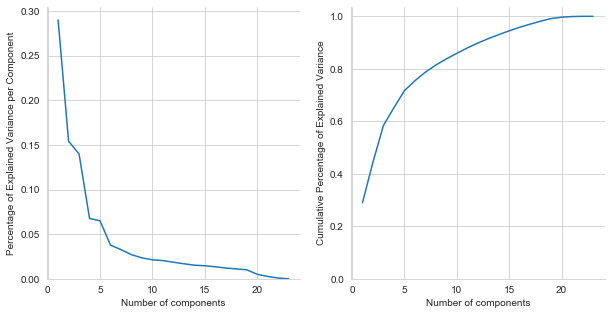

In [4]:
w.pca_plot_var_ratio()
plt.show()

In [9]:
w.reduce_dim(method='pca', **config['reduce_dim']['pca'])

Reducing dimensionality using PCA.
Embedding created. Train MSE: 0.03774701011601303
Train Average Log Likelihood: -5.6448080143563155


In [10]:
w.cluster(method='spectral', **config['cluster']['spectral'])

Embeddings were constructed using pca.
Clustering using spectral clustering.
Clustering complete.


Reducing dimensionality using UMAP.


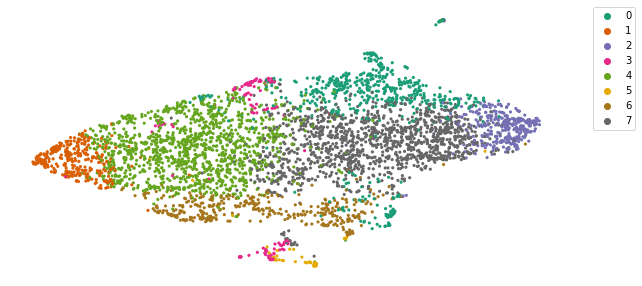

In [13]:
w.reduce_plot(labels=w.y_train_pred, method='umap', **config['reduce_plot']['umap'])